In [1]:
#importation du jeu de données 
#nous travaillerons sur le jeu de données accessoires "Diabetes" inclus dans scikit-learn
#https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y = True)
print("Dimension inputs : ", X.shape)
print("Dimension target : ", y.shape)

Dimension inputs :  (442, 10)
Dimension target :  (442,)


In [2]:
#pre-traitement du jeu de données : séparation du jeu de données et normalisation des données
#séparation du jeu de données
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
#normalisation du jeu de données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
#entrainement d'une régression ridge par équation normale ou solution exacte
#on emploi la régression rigde parce que nous soupsçonnons une multicolinératié
from sklearn.linear_model import Ridge
a = 10
reg = Ridge(alpha = a)
reg.fit(X_train, y_train)
print("Coefficients : ", reg.coef_)
print("Intercept : ", reg.intercept_)

Coefficients :  [  0.54645395 -10.65168437  23.54511125  12.96952139  -9.45870123
   0.5942479   -6.68857116   5.55293411  25.93796822   4.04444508]
Intercept :  152.74018126888217


In [4]:
#entrainement d'une régression linéaire sans régularisation par équation normale
#...et comparaison des résultats des coefficients
from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)
print("Coefficients : ", reg_lin.coef_)
print("Intercept : ", reg_lin.intercept_)

#on peut constater que le coefficient constantn'est pas régularisé
#seul les coefficients de pondération sont régularisée

Coefficients :  [  0.54783243 -11.22582675  23.92511496  13.42529794 -37.8240487
  22.51759731   6.00402335   9.24117729  37.39053874   3.66919686]
Intercept :  152.74018126888217


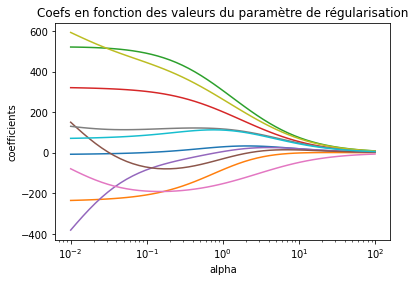

In [5]:
#traçons le chemin de régularisation
#...c'est-à-dire l'évolution des coefficients de régression en fonction 
#...d'un espace de valeurs de l'hyperparamètre de régularisation
import numpy as np
import matplotlib.pyplot as plt
#définition de l'espace de l'hyperparamètre
n_alphas = 50
alphas = np.logspace(-2, 2, n_alphas)
#apprentissage de la régression ridge pour chaque valeur de l'hyperparamètre
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
#tracé du chemin de régularisation
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Coefs en fonction des valeurs du paramètre de régularisation")
plt.axis("tight")
plt.show()

In [6]:
#recherche du meilleur paramètre de régularisation par Grille-Complète
from sklearn.model_selection import GridSearchCV
#définition de l'espace de l'hyperparamètre
n_alphas = 50
alphas = np.logspace(-2, 2, n_alphas)
#réalisation de la recherche par grille complète
parameters = {"alpha" : alphas}
ridge = Ridge()
ridge_gridcv = GridSearchCV(ridge, parameters)
ridge_gridcv.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2.94705170e-01, 3.55648...
       9.10298178e-01, 1.09854114e+00, 1.32571137e+00, 1.59985872e+00,
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02])})

In [7]:
#meilleur hyperparamètre retourné
ridge_gridcv.best_estimator_

Ridge(alpha=22.229964825261934)

In [8]:
#entrainement du modèle final pour le paramètre optimal
reg = Ridge(alpha = ridge_gridcv.best_params_["alpha"])
reg.fit(X_train, y_train)

Ridge(alpha=22.229964825261934)

In [9]:
#evaluation du modèle par l'erreur quadratique moyenne
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("L'erreur quadratique moyenne (MSE) sur le test set: {:.2f}".format(mse))
print("Soit erreur moyenne de : {:.2f}".format(np.sqrt(mse)))
print("Prediction sur les 5 premières instances :", np.round(y_pred[:5], 2))
print("True labels on first instances :", y_test[:5])

L'erreur quadratique moyenne (MSE) sur le test set: 3378.59
Soit erreur moyenne de : 58.13
Prediction sur les 5 premières instances : [222.87 152.72 144.43 211.51 191.45]
True labels on first instances : [ 99. 168.  90. 249. 178.]


In [10]:
#il est possible de réaliser une régression ridge par déscente de gradient au lieu d'utiliser l'équation normale
from sklearn.linear_model import SGDRegressor
a = ridge_gridcv.best_params_["alpha"] #paramètre de régularisation
ridge_sgd = SGDRegressor(loss = "squared_error", penalty = "l2", alpha = a)
ridge_sgd.fit(X_train, y_train)

print("Coefficients : ", ridge_sgd.coef_)
print("Intercept : ", ridge_sgd.intercept_)

Coefficients :  [ 0.25900064 -0.93411313  3.07678809  0.94251698  0.71818905  0.47558328
 -1.461212    1.62225602  2.24976236  1.24277494]
Intercept :  [152.71639344]
